In [1]:
from keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def function_1(x):
  return 3 * np.sin(np.pi*x)

def function_2(x):
  return 1 + 2*x + 4*(x**3)

In [3]:
def selector(n, x):
  if n == 1:
    return function_1(x)
  elif n == 2:
    return function_2(x)
 

In [4]:
function = 1

In [5]:
X = (np.random.rand(500)*2)-1
X = np.sort(X)
X = X.reshape(500,1)
Y = selector(function, X)

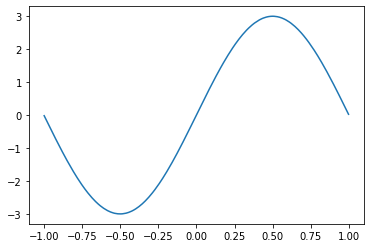

In [6]:
plt.plot(X,Y)

In [28]:
model = models.Sequential()
model.add(layers.Dense(2, activation = 'tanh', input_shape = (1, )))
model.add(layers.Dense(4, activation = 'tanh'))
model.add(layers.Dense(8, activation = 'tanh'))
model.add(layers.Dense(1, activation = 'linear'))

In [29]:
model.compile(optimizer = 'rmsprop',
              loss = 'mse',
              metrics = ['mae'])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 4         
                                                                 
 dense_9 (Dense)             (None, 4)                 12        
                                                                 
 dense_10 (Dense)            (None, 8)                 40        
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [31]:
X_val = (np.random.rand(500)*2)-1
X_val = np.sort(X_val)
X_val = X_val.reshape(500,1)
Y_val = selector(function, X_val)

In [32]:
history = model.fit(X, Y,
          epochs = 700,
          batch_size = 100,
          validation_data = (X_val, Y_val))

Epoch 1/700
5/5 [==============================] - 1s 39ms/step - loss: 4.0074 - mae: 1.7807 - val_loss: 4.1713 - val_mae: 1.8316
Epoch 2/700
5/5 [==============================] - 0s 9ms/step - loss: 3.8577 - mae: 1.7418 - val_loss: 4.0438 - val_mae: 1.8002
Epoch 3/700
5/5 [==============================] - 0s 12ms/step - loss: 3.7455 - mae: 1.7133 - val_loss: 3.9314 - val_mae: 1.7726
Epoch 4/700
5/5 [==============================] - 0s 12ms/step - loss: 3.6434 - mae: 1.6872 - val_loss: 3.8257 - val_mae: 1.7465
Epoch 5/700
5/5 [==============================] - 0s 12ms/step - loss: 3.5445 - mae: 1.6622 - val_loss: 3.7225 - val_mae: 1.7209
Epoch 6/700
5/5 [==============================] - 0s 12ms/step - loss: 3.4502 - mae: 1.6381 - val_loss: 3.6223 - val_mae: 1.6963
Epoch 7/700
5/5 [==============================] - 0s 12ms/step - loss: 3.3559 - mae: 1.6143 - val_loss: 3.5221 - val_mae: 1.6718
Epoch 8/700
5/5 [==============================] - 0s 8ms/step - loss: 3.2623 - mae: 1.5903

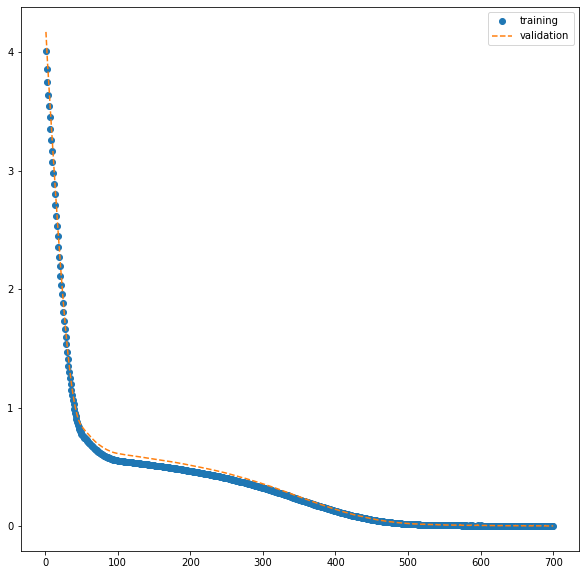

In [33]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='validation')
plt.legend()
plt.show()

In [34]:
model.compile(optimizer = 'adam',
              loss = 'mse',
              metrics = ['mae'])

In [35]:
X_val = (np.random.rand(500)*2)-1
X_val = np.sort(X_val)
X_val = X_val.reshape(500,1)
Y_val = selector(function, X_val)

In [36]:
history = model.fit(X, Y,
          epochs = 500,
          batch_size = 100,
          validation_data = (X_val, Y_val))

Epoch 1/500
5/5 [==============================] - 0s 40ms/step - loss: 0.0038 - mae: 0.0444 - val_loss: 0.0048 - val_mae: 0.0517
Epoch 2/500
5/5 [==============================] - 0s 8ms/step - loss: 0.0036 - mae: 0.0432 - val_loss: 0.0043 - val_mae: 0.0440
Epoch 3/500
5/5 [==============================] - 0s 8ms/step - loss: 0.0032 - mae: 0.0402 - val_loss: 0.0040 - val_mae: 0.0457
Epoch 4/500
5/5 [==============================] - 0s 11ms/step - loss: 0.0031 - mae: 0.0406 - val_loss: 0.0038 - val_mae: 0.0430
Epoch 5/500
5/5 [==============================] - 0s 9ms/step - loss: 0.0030 - mae: 0.0393 - val_loss: 0.0038 - val_mae: 0.0437
Epoch 6/500
5/5 [==============================] - 0s 8ms/step - loss: 0.0030 - mae: 0.0398 - val_loss: 0.0037 - val_mae: 0.0432
Epoch 7/500
5/5 [==============================] - 0s 8ms/step - loss: 0.0030 - mae: 0.0392 - val_loss: 0.0037 - val_mae: 0.0428
Epoch 8/500
5/5 [==============================] - 0s 8ms/step - loss: 0.0029 - mae: 0.0390 - v

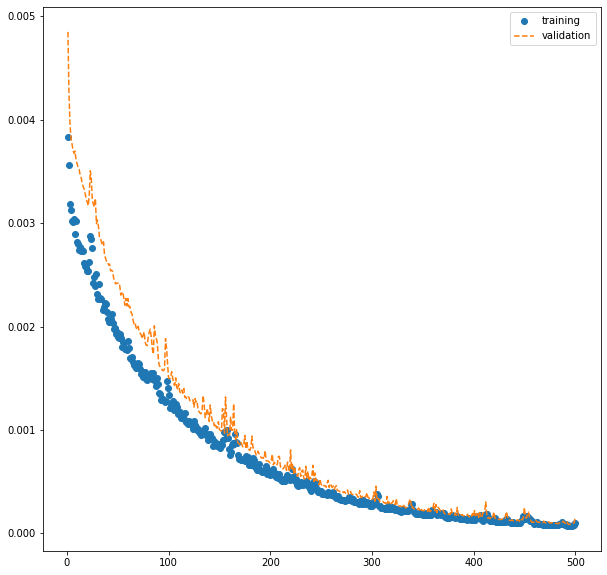

In [37]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='validation')
plt.legend()
plt.show()

In [38]:
X_test = (np.random.rand(500)*2)-1
X_test = np.sort(X_test)
X_test = X_test.reshape(500,1)

In [39]:
a = model.predict(X_test)

16/16 [==============================] - 0s 2ms/step


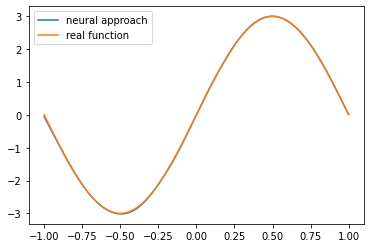

In [40]:
plt.plot(X_test, a, label = 'neural approach')
plt.plot(X_test, selector(function, X_test), label = 'real function')
plt.legend()
plt.show()